In [82]:
import pandas as pd

dataset = ['Nila3.csv', 'Kembung3.csv', 'Dencis3.csv']
dfs = [pd.read_csv(file_name).iloc[:, 1:] for file_name in dataset]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,mean_h,mean_s,mean_v,stddev_h,stddev_s,stddev_v,label
0,179.419769,138.297623,121.415604,69.486936,54.421512,55.036132,107.196045,86.394012,183.420059,34.126353,43.139990,66.392869,1
1,154.772293,104.791809,87.240585,66.284176,47.559412,43.165031,103.076248,113.454102,156.397339,32.277151,45.997333,64.989584,1
2,144.589401,119.292786,109.565201,63.970370,55.457042,55.402740,100.663284,76.746933,147.517883,37.146067,49.807133,64.068007,1
3,186.541824,143.668060,119.410797,79.408182,54.563225,47.409796,104.169724,105.299728,198.791931,28.499063,36.906582,67.835431,1
4,162.301651,133.708389,127.735703,67.742255,56.001978,56.299471,111.065643,69.133575,165.899277,40.296251,43.532904,65.093960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,106.621277,82.054916,67.957581,38.146220,31.398523,24.272628,110.011108,90.684448,106.660324,3.810006,15.953864,38.168015,3
896,102.599899,78.420822,65.824539,37.158384,30.279951,24.039783,110.593445,89.752487,102.638870,3.720230,15.947235,37.184677,3
897,105.452515,80.707642,67.225967,37.834399,31.153241,24.453166,110.399872,90.975449,105.476059,3.702439,14.856300,37.848768,3
898,106.438126,81.963104,67.943741,38.479129,31.430000,24.367620,109.870300,90.378876,106.465546,3.587859,15.605348,38.494720,3


In [83]:
# Pisahkan atribut dan label
X = combined_df.drop('label', axis=1)
y = combined_df['label']

Train Test Split

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [85]:
X_train.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,mean_h,mean_s,mean_v,stddev_h,stddev_s,stddev_v
413,112.426208,86.977600,71.551514,41.624578,33.299100,24.781768,107.777893,88.122910,112.811996,15.090030,35.230790,41.704120
80,188.138092,146.134903,128.989059,69.068425,55.247718,52.389325,106.112732,88.813187,194.769623,28.660885,36.386115,62.003594
536,124.312256,83.513489,72.935516,47.661151,35.914950,28.042724,115.125259,103.379745,124.821976,4.300419,23.601438,47.692507
159,179.894150,132.247238,119.274353,62.524312,47.416888,43.738928,102.662689,89.990479,181.867188,34.013630,33.948349,58.833456
841,107.178909,81.984726,64.743713,45.529582,37.497524,27.805785,108.759247,99.728195,107.179077,3.993524,18.307789,45.529314


In [86]:
y_train[0:5]

413    2
80     1
536    3
159    2
841    3
Name: label, dtype: int64

Feature Scalling

In [87]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

SVM

In [88]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [89]:
y_pred = svm.predict(X_test)

Confusion Matrix

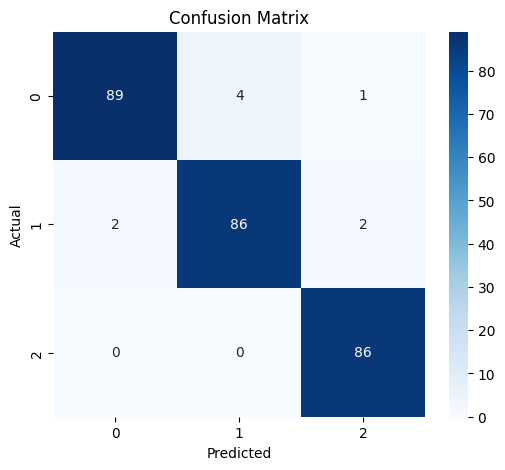

In [90]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

#Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [91]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.95      0.96        94
           2       0.96      0.96      0.96        90
           3       0.97      1.00      0.98        86

    accuracy                           0.97       270
   macro avg       0.97      0.97      0.97       270
weighted avg       0.97      0.97      0.97       270



Tuning Parameter

In [92]:
from sklearn.model_selection import GridSearchCV

parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'], 'gamma': [0.01, 0.1, 0.2, 0.5], 'C': [1, 10, 100, 1000]}
]

grid_search = GridSearchCV(SVC(decision_function_shape='ovr'), parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.1, 0.2, 0.5], 'kernel': ['rbf']}],
             scoring='accuracy')

In [93]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [94]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.2f (+/-%0.02f) for %r" % (mean, std * 2, params))


0.89 (+/-0.09) for {'C': 1, 'kernel': 'linear'}
0.92 (+/-0.06) for {'C': 10, 'kernel': 'linear'}
0.93 (+/-0.05) for {'C': 100, 'kernel': 'linear'}
0.93 (+/-0.04) for {'C': 1000, 'kernel': 'linear'}
0.86 (+/-0.05) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.95 (+/-0.03) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.96 (+/-0.03) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.96 (+/-0.03) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.93 (+/-0.05) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 (+/-0.01) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.97 (+/-0.01) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.97 (+/-0.01) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.96 (+/-0.05) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 (+/-0.03) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.97 (+/-0.02) for {'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}
0.97 (+/-0.01) for {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.98 (+/-0.03) for {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 (+/-0.03) f

In [95]:
y_pred_svm = grid_search.predict(X_test)

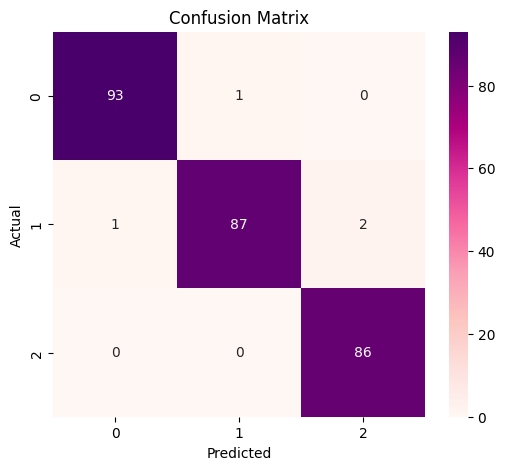

In [96]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)

#Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        94
           2       0.99      0.97      0.98        90
           3       0.98      1.00      0.99        86

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



In [100]:
import cv2
import numpy as np

# Fungsi untuk ekstraksi fitur dari gambar
def extract_features(image_path):
    img = cv2.imread(image_path)  # Membaca gambar
    resized_img = cv2.resize(img, (256, 256))  # Mengubah ukuran gambar

    # Ekstraksi fitur dari setiap saluran warna
    red_channel = resized_img[:,:,0]
    green_channel = resized_img[:,:,1]
    blue_channel = resized_img[:,:,2]

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    # Konversi ke HSV
    hsv_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2HSV)
    hue_channel = hsv_img[:,:,0]
    saturation_channel = hsv_img[:,:,1]
    value_channel = hsv_img[:,:,2]

    hue_mean = np.mean(hue_channel)
    saturation_mean = np.mean(saturation_channel)
    value_mean = np.mean(value_channel)

    hue_std = np.std(hue_channel)
    saturation_std = np.std(saturation_channel)
    value_std = np.std(value_channel)

    # Gabungkan semua fitur menjadi satu vektor fitur
    features = [red_mean, green_mean, blue_mean, red_std, green_std, blue_std,
                hue_mean, saturation_mean, value_mean, hue_std, saturation_std, value_std]
    return np.array(features).reshape(1, -1)

# Path ke gambar baru yang akan diprediksi
new_image_path = 'D:\\KULIAH\\Semester 8\\Skripsi\\dataset\\data_kembung/1.jpg'

# Ekstrak fitur dari gambar baru
new_features = extract_features(new_image_path)

# Lakukan prediksi menggunakan model SVM yang telah dilatih
prediction = svm.predict(new_features)

# Tampilkan hasil prediksi
print("Prediksi kelas:", prediction)


Prediksi kelas: [1]
